In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 10000
d1 = 5
d2 = 100
mu_set = np.concatenate(([0.001], np.arange(0.01, 1, 0.01),[0.999]))

In [3]:
def getSample(mu, n, d):
    return np.random.binomial(1, mu, [n, d])

def calErr(mu, data, n, d):
    # calculate statstical error
    stat_err = np.max(np.abs((data.sum(axis=0)/len(data) - mu)))
    # calculate laplace error
    lap_noise = np.random.laplace(0, d/(np.sqrt(2)*n), d)
    lap_err = np.max(np.abs(lap_noise))
    # calculate gaussian error
    gauss_noise = np.random.laplace(0, np.sqrt(d)/(np.sqrt(2)*n), d)
    gauss_err = np.max(np.abs(gauss_noise))

    return stat_err, lap_err, gauss_err

In [4]:
# for d1=5
stat_err = []
lap_err = []
gauss_err = []

for mu in mu_set:
    sample = getSample(mu, n, d1)
    e1, e2, e3 = calErr(mu, sample, n, d1)
    stat_err.append(e1)
    lap_err.append(e2)
    gauss_err.append(e3)

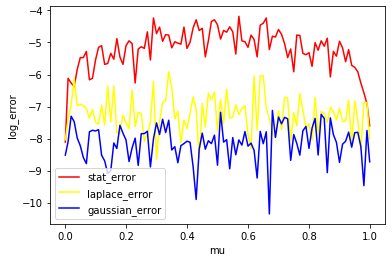

In [5]:
plt.plot(mu_set, np.log(stat_err), color="red",label="stat_error")
plt.plot(mu_set, np.log(lap_err), color="yellow",label="laplace_error")
plt.plot(mu_set, np.log(gauss_err), color="blue",label="gaussian_error")
plt.xlabel("mu")
plt.ylabel("log_error")
plt.legend()

In [8]:
# for d2 = 100
stat_err = []
lap_err = []
gauss_err = []

for mu in mu_set:
    sample = getSample(mu, n, d2)
    e1, e2, e3 = calErr(mu, sample, n, d2)
    stat_err.append(e1)
    lap_err.append(e2)
    gauss_err.append(e3)

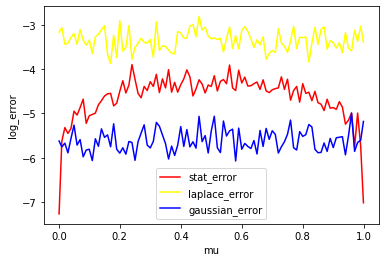

In [9]:
plt.plot(mu_set, np.log(stat_err), color="red",label="stat_error")
plt.plot(mu_set, np.log(lap_err), color="yellow",label="laplace_error")
plt.plot(mu_set, np.log(gauss_err), color="blue",label="gaussian_error")
plt.xlabel("mu")
plt.ylabel("log_error")
plt.legend()